## Dimensionality Reduction

* **Curse of Dementionality**  
If there are too many features you have to consider(== When the problem is too high dimentional data),
it is hard to consider every features(it can cause reduction of accuracy etc...).
So, you can shrink those like you prunned the decision tree models.

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings(action='ignore')

In [54]:
# Scatter plot function for a visulaisation
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches

def plot_labelled_scatter(X, y, class_labels):
    n_labels = len(class_labels)
    
    X_min, X_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    marker_array = ['o', '^', '*']
    color_array = ['#FFFF00', '#00AAFF', '#000000', '#FF00AA']
    cmap_bold = ListedColormap(color_array)
    bnorm = BoundaryNorm(np.arange(0, n_labels + 1, 1), ncolors=n_labels)
    plt.figure()
    
    plt.scatter(X[:, 0], X[:, 1], s=65, c=y, cmap=cmap_bold,
                norm=bnorm, alpha=0.40, edgecolors='black', lw=1)
    
    plt.xlim(X_min, X_max)
    plt.ylim(y_min, y_max)

    h = []
    for c in range(0, n_labels):
        h.append(mpatches.Patch(color=color_array[c], label=class_labels[c]))
    

In [55]:
# Import the toy dataset.
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X, y = load_breast_cancer(return_X_y=True)
print(X.shape, '/', y.shape)

(569, 30) / (569,)


### 1. PCA  
: Principal Components Analysis

In [17]:
from sklearn.decomposition import PCA

X_norm = StandardScaler().fit(X).transform(X)
pca = PCA(n_components=2).fit(X_norm)
X_pca = pca.transform(X_norm)

print(X.shape, X_pca.shape)

(569, 30) (569, 2)


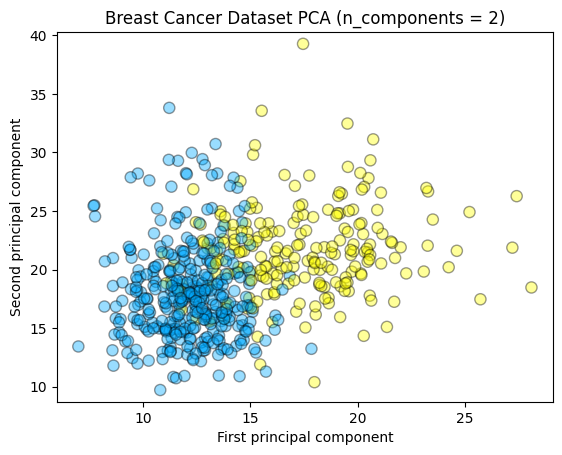

In [50]:
# Plot the PCA-transformed breast cancer dataset.
plot_labelled_scatter(X, y, ['malignant', 'benign'])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Breast Cancer Dataset PCA (n_components = 2)');

### 2. MDS  
: Multidimensional Scaling

In [52]:
X, y = load_breast_cancer(return_X_y=True)
X_norm = StandardScaler().fit(X).transform(X)

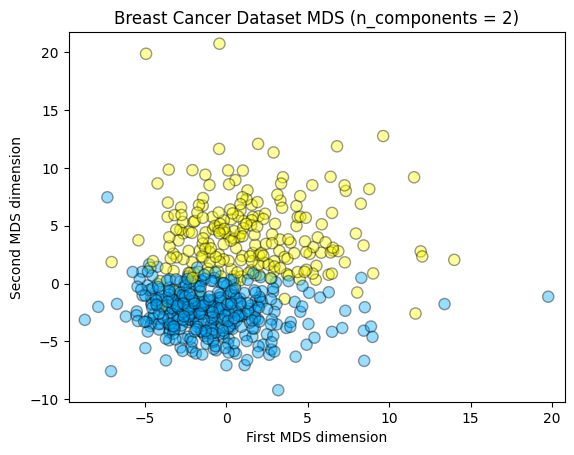

In [58]:
from sklearn.manifold import MDS

mds = MDS(n_components=2)
X_mds = mds.fit_transform(X_norm)

# Check the result with a visualisation
plot_labelled_scatter(X_mds, y, ['malignant', 'benign'])
plt.xlabel('First MDS dimension')
plt.ylabel('Second MDS dimension')
plt.title('Breast Cancer Dataset MDS (n_components = 2)');

### 3. t-SNE  
: t-distributed Stochastic Neighbor Embedding

In [59]:
X, y = load_breast_cancer(return_X_y=True)
X_norm = StandardScaler().fit(X).transform(X)

In [60]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=0)
X_tsne = tsne.fit_transform(X_norm)

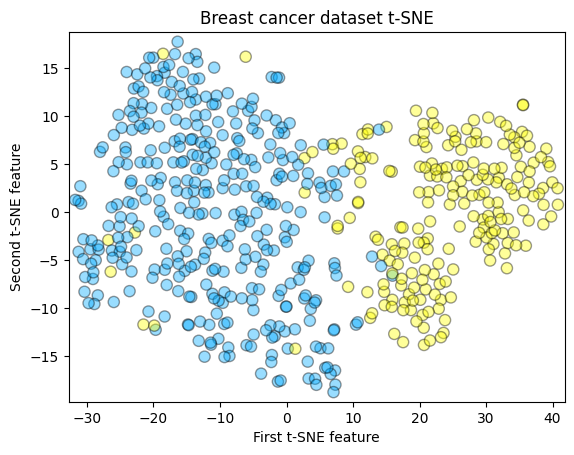

In [61]:
plot_labelled_scatter(X_tsne, y, ['malignant', 'benign'])
plt.xlabel('First t-SNE feature')
plt.ylabel('Second t-SNE feature')
plt.title('Breast cancer dataset t-SNE');